Dataset: Wastewater Treatment Plant Dataset 


The dataset contains daily measurements from a full-scale wastewater treatment plant, including various physicochemical properties that help assess plant performance. The dataset can be used to analyse the plant's operational effectiveness and predict potential faults.
Dataset Link : https://www.kaggle.com/datasets/d4rklucif3r/full-scale-waste-water-treatment-plant-dat
a
The objective is to build a machine learning model that predicts whether the wastewater treatment process is operating optimally based on daily measurements of the plant's operational data


In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [449]:
df = pd.read_csv('Data-Melbourne_F_fixed.csv')
df.head()

,Serial number,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7


1.	Data Preprocessing: 
Perform comprehensive data preprocessing, including handling missing values, scaling, and feature selection, while visualizing key trends and correlations to enhance data insights and model performance.


In [451]:
df.isnull().sum()

Serial number               0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

In [452]:
df['temperature_difference']=df['Maximum temperature']-df['Minimum temperature']
df.head()

,Serial number,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,...,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,temperature_difference
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,...,0.0,56,1.52,10.0,26.9,53.5,2014,1,1,12.5
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,...,0.0,63,0.00,10.0,14.4,27.8,2014,1,2,11.3
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,...,0.0,47,0.25,10.0,31.9,61.1,2014,1,5,18.4
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,...,0.0,49,0.00,10.0,27.0,38.9,2014,1,6,8.8
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,...,0.0,65,0.00,10.0,20.6,35.2,2014,1,7,11.1


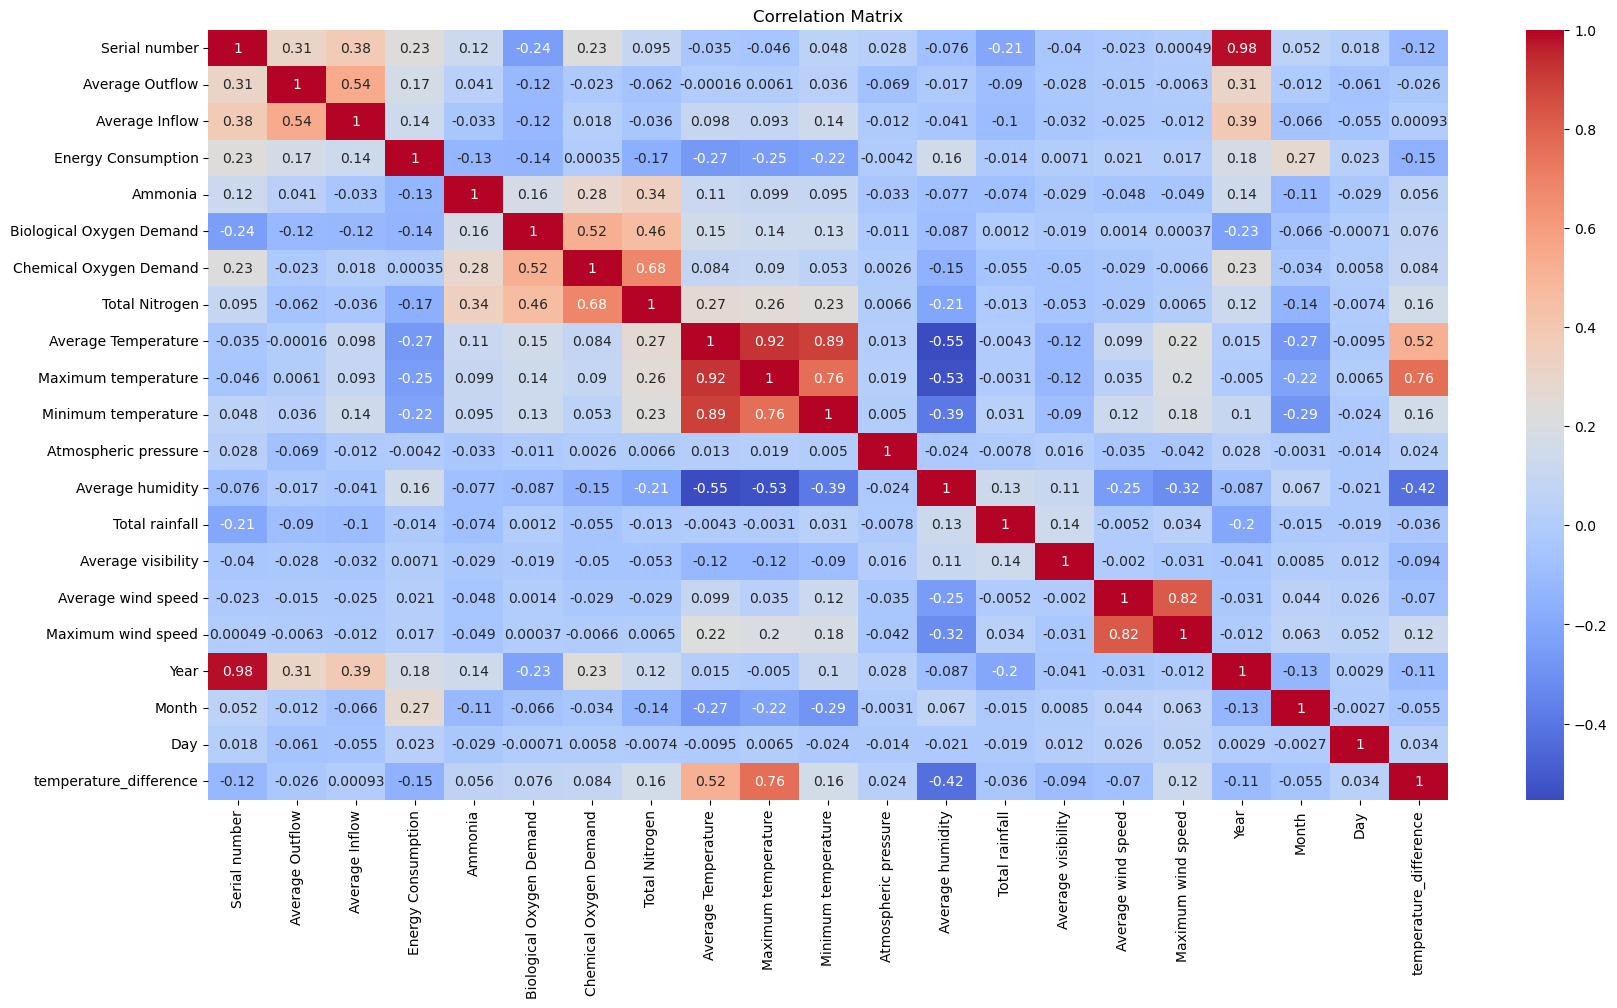

In [453]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

2.	Modeling with Machine Learning Algorithms:
Apply various machine learning algorithms to classify the operational state of the wastewater treatment process. Use the following algorithms:
o	Logistic Regression from scratch as well as from sklearn
o	K-Nearest Neighbours (KNN)
o	Decision Tree Classifier
o	Random Forest Classifier
o	Support Vector Machine (SVM)
o	Any other relevant algorithms you feel might improve performance.


In [455]:
determining_value=df['Chemical Oxygen Demand'].mean()
df['cod']=df['Chemical Oxygen Demand'].apply(lambda x:1 if x>determining_value else 0)

In [456]:
x = df.drop(['cod' , 'Chemical Oxygen Demand'] , axis = 1)
y = df['cod']

In [457]:
x_train , x_test , y_train , y_test = train_test_split(x, y, random_state = 20 , test_size = 0.2)

In [458]:
st = StandardScaler()
x_train_sc = st.fit_transform(x_train)
x_test_sc = st.transform(x_test)

In [459]:
m1 = LogisticRegression()

m1.fit(x_train_sc, y_train)


y_pred_m1 = m1.predict(x_test_sc)

In [460]:
m2 = KNeighborsClassifier()

m2.fit(x_train_sc, y_train)


y_pred_m2 = m2.predict(x_test_sc)

In [461]:
m3 = DecisionTreeClassifier()

m3.fit(x_train_sc, y_train)


y_pred_m3 = m3.predict(x_test_sc)

In [462]:
m4 = RandomForestClassifier()

m4.fit(x_train_sc, y_train)


y_pred_m4 = m4.predict(x_test_sc)

In [463]:
m5 = SVC()

m5.fit(x_train_sc, y_train)


y_pred_m5 = m5.predict(x_test_sc)

3.	Model Evaluation:
Evaluate and compare models using accuracy, F1-score, and confusion matrix, and perform hyperparameter tuning to optimize performance on the test dataset.


In [465]:
accuracy = accuracy_score(y_test, y_pred_m1)
f1 = f1_score(y_test, y_pred_m1)  
cm = confusion_matrix(y_test, y_pred_m1)    

print(f"m1")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

m1
Accuracy: 0.79
F1 Score: 0.78
Confusion Matrix:
[[120  28]
 [ 29 100]]


In [466]:
accuracy = accuracy_score(y_test, y_pred_m2)
f1 = f1_score(y_test, y_pred_m2)  
cm = confusion_matrix(y_test, y_pred_m2)    

print(f"m2")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

m2
Accuracy: 0.73
F1 Score: 0.71
Confusion Matrix:
[[110  38]
 [ 37  92]]


In [467]:
accuracy = accuracy_score(y_test, y_pred_m3)
f1 = f1_score(y_test, y_pred_m3)  
cm = confusion_matrix(y_test, y_pred_m3)    

print(f"m3")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

m3
Accuracy: 0.82
F1 Score: 0.82
Confusion Matrix:
[[119  29]
 [ 20 109]]


In [468]:
accuracy = accuracy_score(y_test, y_pred_m4)
f1 = f1_score(y_test, y_pred_m4)  
cm = confusion_matrix(y_test, y_pred_m4)    

print(f"m4")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

m4
Accuracy: 0.88
F1 Score: 0.88
Confusion Matrix:
[[127  21]
 [ 11 118]]


In [469]:
accuracy = accuracy_score(y_test, y_pred_m5)
f1 = f1_score(y_test, y_pred_m5) 
cm = confusion_matrix(y_test, y_pred_m5)    

print(f"m5")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

m5
Accuracy: 0.79
F1 Score: 0.78
Confusion Matrix:
[[117  31]
 [ 26 103]]


In [470]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf.fit(x_train_sc, y_train)

print(f"Best Parameters: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_
Y_pred_rf_tuned = best_rf.predict(x_test_sc)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
